In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rcparams

In [2]:
def average_n_list(N, lp, Ebind0, R0, R_cell, r_mono, T=1, kB=1):
    n = np.arange(1, N+1)
    beta = 1.0 / (kB * T)
    dEbend = r_mono * (n - 1) * (kB * T * lp) * ( (1/R_cell) - (1/R0)  )**2
    dEbind = n * Ebind0
    w_n = (N - n + 1) * np.exp(-beta * (dEbend + dEbind))
    Z = np.sum(w_n)
    p_n = w_n / Z
    avg_n = np.sum(n * p_n)
    return avg_n

In [3]:

def heat_map_maker(N, lp, Ebind0, R0, R_cell, r_mono, T=1, kB=1):
    N = np.array(N)
    lp = np.array(lp)
    Ebind0 = np.array(Ebind0)
    R0 = np.array(R0)
    R_cell = np.array(R_cell)
    r_mono = np.array(r_mono)
    
    num_N, num_lp, num_Ebind0, num_R0, num_R_cell, num_r_mono = len(N), len(lp), len(Ebind0), len(R0), len(R_cell), len(r_mono)
    
    lengths_list = [num_N, num_lp, num_Ebind0, num_R0, num_R_cell, num_r_mono]
    
    avg_n = np.zeros((num_N, num_lp, num_Ebind0, num_R0, num_R_cell, num_r_mono))
    
    multidimensionality = 0
    for length in lengths_list:
        if length != 1:
            multidimensionality += 1
        
    if (multidimensionality) > 2:
        raise ValueError("Only 2 parameters can be varied at a time. {} were varied.".format(multidimensionality))
    
    if multidimensionality < 1:
        raise ValueError("At least 1 parameter must be varied.")
    
    for N_i in range(num_N):
        for lp_i in range(num_lp):
            for Ebind0_i in range(num_Ebind0):
                for R0_i in range(num_R0):
                    for R_cell_i in range(num_R_cell):
                        for r_mono_i in range(num_r_mono):
                            avg_n_val = average_n_list(N[N_i], lp[lp_i], Ebind0[Ebind0_i], R0[R0_i], R_cell[R_cell_i], r_mono[r_mono_i], T, kB)
                            avg_n[N_i, lp_i, Ebind0_i, R0_i, R_cell_i, r_mono_i] = avg_n_val
    
    required_shape = []
    for shape in lengths_list:
        if shape != 1:
            required_shape.append(shape)
    
    avg_n_flat = avg_n.reshape(required_shape)
                            
    
    return avg_n_flat

In [4]:
N = [20]
lp = np.linspace(1000, 2000, 100)
Ebind0 = np.linspace(-2.0, 0.0, 100)
R0 = [100]
R_cell = [350]
r_mono = [2.5]

avg_n = heat_map_maker(N, lp, Ebind0, R0, R_cell, r_mono)

print(avg_n.shape)

(100, 100)


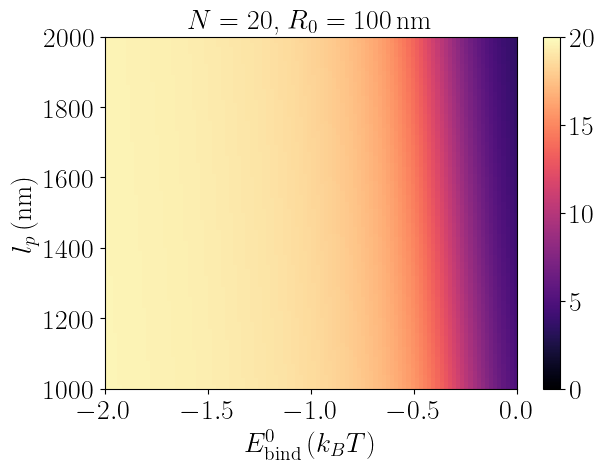

In [5]:
plt.imshow(avg_n, extent=[Ebind0[0], Ebind0[-1], lp[0], lp[-1]], aspect='auto', origin='lower', cmap='magma', vmin=0, vmax=N[0])
plt.colorbar()

plt.xlabel(r'$E_{\rm bind}^0\,(k_BT)$')
plt.ylabel(r'$l_p\,(\mathrm{nm})$')

plt.title(r'$N = {}$, $R_0 = {}\,\mathrm{{nm}}$'.format(N[0], R0[0]))

plt.savefig('hm_lp_Eb_N_{}_R0_{}.pdf'.format(N[0], R0[0]))

In [6]:
N = [20]
lp = [1200]
Ebind0 = np.linspace(-2.0, 0.0, 100)
R0 = np.linspace(10, 400, 100)
R_cell = [350]
r_mono = [2.5]

avg_n = heat_map_maker(N, lp, Ebind0, R0, R_cell, r_mono)

print(avg_n.shape)

(100, 100)


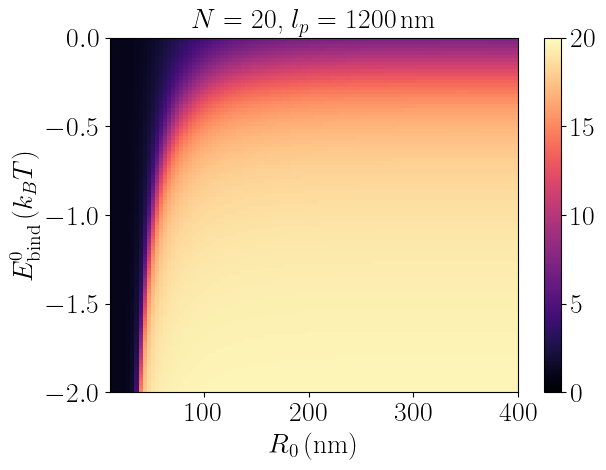

In [7]:
plt.imshow(avg_n, extent=[R0[0], R0[-1], Ebind0[0], Ebind0[-1]], aspect='auto', origin='lower', cmap='magma', vmin=0, vmax=N[0])

plt.colorbar()

plt.xlabel(r'$R_0\,(\mathrm{nm})$')
plt.ylabel(r'$E_{\rm bind}^0\,(k_BT)$')

plt.title(r'$N = {}$, $l_p = {}\,\mathrm{{nm}}$'.format(N[0], lp[0]))

plt.savefig('hm_R0_Eb_N_{}_lp_{}.pdf'.format(N[0], lp[0]))

In [8]:
N = np.arange(2, 101)
lp = [1200]
Ebind0 = np.linspace(-2.0, 0.0, 100)
R0 = [100]
R_cell = [350]
r_mono = [2.5]

avg_n = heat_map_maker(N, lp, Ebind0, R0, R_cell, r_mono)

print(avg_n.shape)

(99, 100)


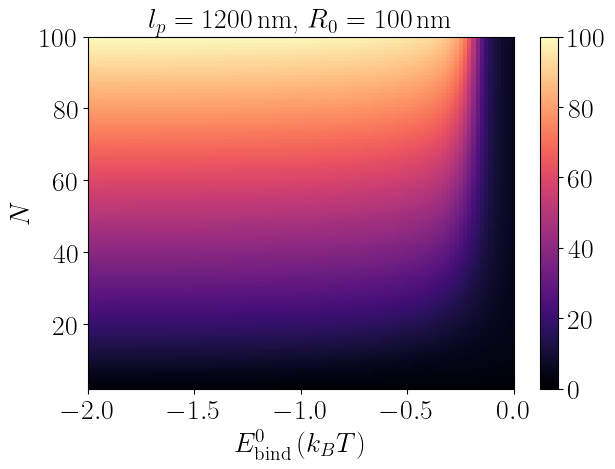

In [9]:
plt.imshow(avg_n, extent=[Ebind0[0], Ebind0[-1], N[0], N[-1]], aspect='auto', origin='lower', cmap='magma', vmin=0, vmax=N[-1])

plt.colorbar()

plt.xlabel(r'$E_{\rm bind}^0\,(k_BT)$')
plt.ylabel(r'$N$')

plt.title(r'$l_p = {}\,\mathrm{{nm}}$, $R_0 = {}\,\mathrm{{nm}}$'.format(lp[0], R0[0]))

plt.savefig('hm_N_Eb_lp_{}_R0_{}.pdf'.format(lp[0], R0[0]))